<a href="https://colab.research.google.com/github/XAI-liacs/BLADE/blob/feature%2Fcodex-create-tutorials-for-jupyter-notebooks/docs/notebooks/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BLADE Minimal Example.
* In this example, we will implement a simple LLM based optimisation algorithm on `MABBOB` or Many-Affine Black-Box Optimisation Benchamrking, with help of different LLM prompts, and test their relative performance.

## Setting Up...
- Get an API Key from [Gemini](https://aistudio.google.com/apikey), we will be using gemini for this experiment.
- Copy that API Key and go to `Secrets` tab on the sidebar $\leftarrow$:
  - Set `Name` to `GEMINI_API_KEY`
  - Paste the API Key into `Value` section.
  - Activate the notebook access toggle.


In [ ]:
!pip install swig
!pip install iohblade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 46.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00


## Library Overview.
* The iohblade has:
  * `.experiments` that has a list of experiments to choose from to benchmark said algorithm.
  * `.llm` which is an interface that allows the optimisers to interact with the LLM like *Gemini, OLLAMA, OpenAI,*$\ldots$
  * `.methods` are search methods that include *LLaMEA	Large Langugage Model Evolutionary Algorithm, Evolution of Heuristics, FunSearch, ReEvo	Large Language Models as Hyper-Heuristics with Reflective Evolution*.
  * `.loggers` help logging experiment data to run analysis on.


In [ ]:
from iohblade.experiment import MA_BBOB_Experiment
from iohblade.llm import Gemini_LLM
from iohblade.methods import LLaMEA
from iohblade.loggers import ExperimentLogger

from google.colab import userdata

apikey = userdata.get("GEMINI_API_KEY")
ai_model = "gemini-2.5-flash"
llm = Gemini_LLM(apikey, ai_model)
budget = 20 #Small Budget.

## Task Prompt
* The LLMs have often performed measurably distinctly depending on the prompt that is provided. When using different prompts iteratively, this can cause a lot of divergence in the final result.
* Following are the mutation prompts that we test against each other, with their intended mutation size:
  * `Small mutation`: Refine the strategy of the selected algorithm to improve it.
  * `New individual`: Generate a new algorithm that is different from the algorithms you have tried before.
  * `Refinement (really small)`: Refine and simplify the selected algorithm to improve it.

In [3]:
mutation_prompt_1 = ["Refine the strategy of the selected algorithm to improve it."]
mutation_prompt_2 = ["Generate a new algorithm that is different from the algorithms you have tried before."]
mutation_prompt_3 = ["Refine and simplify the selected algorithm to improve it."]


## Implement optimiser.
* Now using `LLaMEA`, we implement $(4, 12)$--4 parents ($\mu$) and 12 offsprings ($\lambda$) evolutionary strategy to test the performance difference between

In [4]:
LLaMEA_1 = LLaMEA(llm, budget=budget, name= "LLaMEA-small_mutation", mutation_prompts=mutation_prompt_1, n_parents=1, n_offspring=1, elitism=True)
LLaMEA_2 = LLaMEA(llm, budget=budget, name= "LLaMEA-new_individual", mutation_prompts=mutation_prompt_2, n_parents=2, n_offspring=4, elitism=True)
LLaMEA_3 = LLaMEA(llm, budget=budget, name= "LLaMEA-fine-mutation", mutation_prompts=mutation_prompt_3, n_parents=2, n_offspring=6, elitism=False)

methods = [LLaMEA_1, LLaMEA_2, LLaMEA_3]

## Run Experiment
* We now use `ExperimentLogger` from `iohblade` to log relevant data for analysis of the algorithms.
* Initialise the `MA_BBOB_Experiment` and run the experiement.  
* ! **WARNING** Running the next cell might incur API costs and will also take several hours to run. You can also skip this step and download the results next.

<div class="alert alert-block alert-warning">
<b>Warning:</b> The next step might take several hours to run (depending on the budget and number of runs) 
</div>

In [ ]:
logger = ExperimentLogger("MA-BBOB")
experiment = MA_BBOB_Experiment(methods=methods, runs=1, seeds=[4], dims=[5], budget_factor=2000, budget=budget, eval_timeout=60, show_stdout=True, exp_logger=logger) #normal run
experiment()

## Save and Download/Upload the run (optional run)
* Instead of running a whole set of experiments (such as the above cell), you can also just download the results we prepared for you:
https://www.dropbox.com/scl/fi/570ucy35verhv6653ey4i/MA-BBOB.zip?rlkey=80ji34uy4amjhbwj3dkv9nx3d&dl=0 
* Upload that *.zip file back up when ready for experiment visualisation, from $\leftarrow$ Files tab.
* Run the next cell to unzip the file.

In [ ]:
!unzip /content/MA-BBOB.zip -d /content/MA-BBOB

Archive:  /content/MA-BBOB.zip
   creating: /content/MA-BBOB/content/MA-BBOB/
   creating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-new_individual-MA_BBOB-7/
  inflating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-new_individual-MA_BBOB-7/conversationlog.jsonl  
  inflating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-new_individual-MA_BBOB-7/log.jsonl  
  inflating: /content/MA-BBOB/content/MA-BBOB/experimentlog.jsonl  
   creating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-small_mutation-MA_BBOB-7/
  inflating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-small_mutation-MA_BBOB-7/conversationlog.jsonl  
  inflating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-small_mutation-MA_BBOB-7/log.jsonl  
  inflating: /content/MA-BBOB/content/MA-BBOB/progress.json  
   creating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-full_ensamble-MA_BBOB-4/
  inflating: /content/MA-BBOB/content/MA-BBOB/run-LLaMEA-full_ensamble-MA_BBOB-4/conversationlog.jsonl  
  inflating: /content/MA-BBOB/content/M

# Visualisation
* The `iohblade` comes with many plots and references to measure algorithm performance. We will use some of them to analyse the experiment data obtained above:
  * `plot_convergence`: Plots convergence of the algorithm, i.e. `evaluation count v fitness` plots.
  * `plot_experiment_CEG`: Plot the Code evolution graphs for each run in an experiment, splitted by problem, it is a plot of `evaluation v count` for ach run of each experiment.
  


In [ ]:
from iohblade import plot_convergence, plot_experiment_CEG

logger = ExperimentLogger("MA-BBOB")
methods, problems = logger.get_methods_problems()
display(methods, problems)

['LLaMEA-fine-mutation',
 'LLaMEA-fine-mutation+new_individual',
 'LLaMEA-new_individual',
 'LLaMEA-full_ensamble',
 'LLaMEA-small_mutation']

['MA_BBOB']

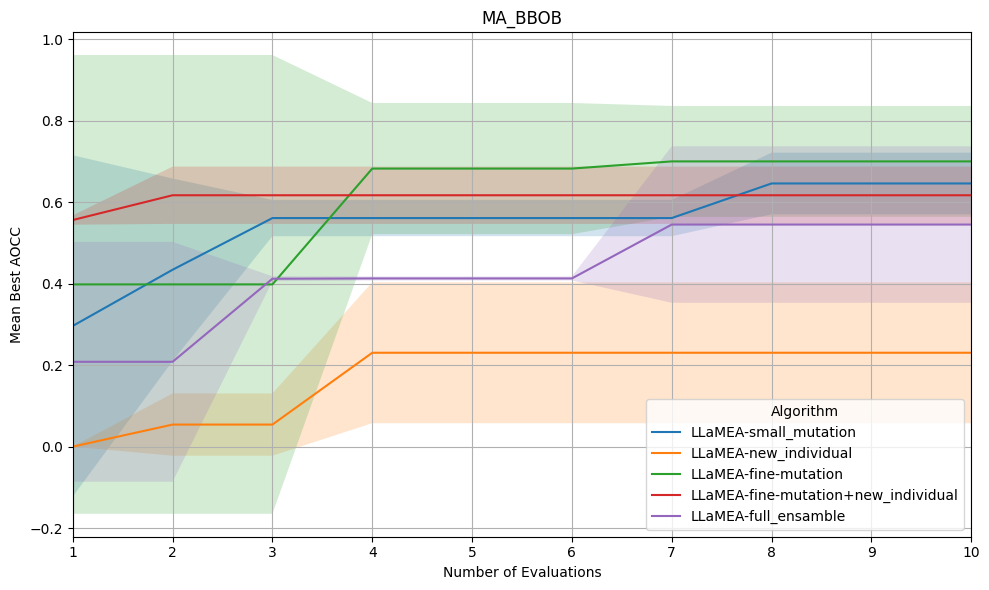

In [ ]:
plot_convergence(logger, metric="AOCC", save=False, budget=10)

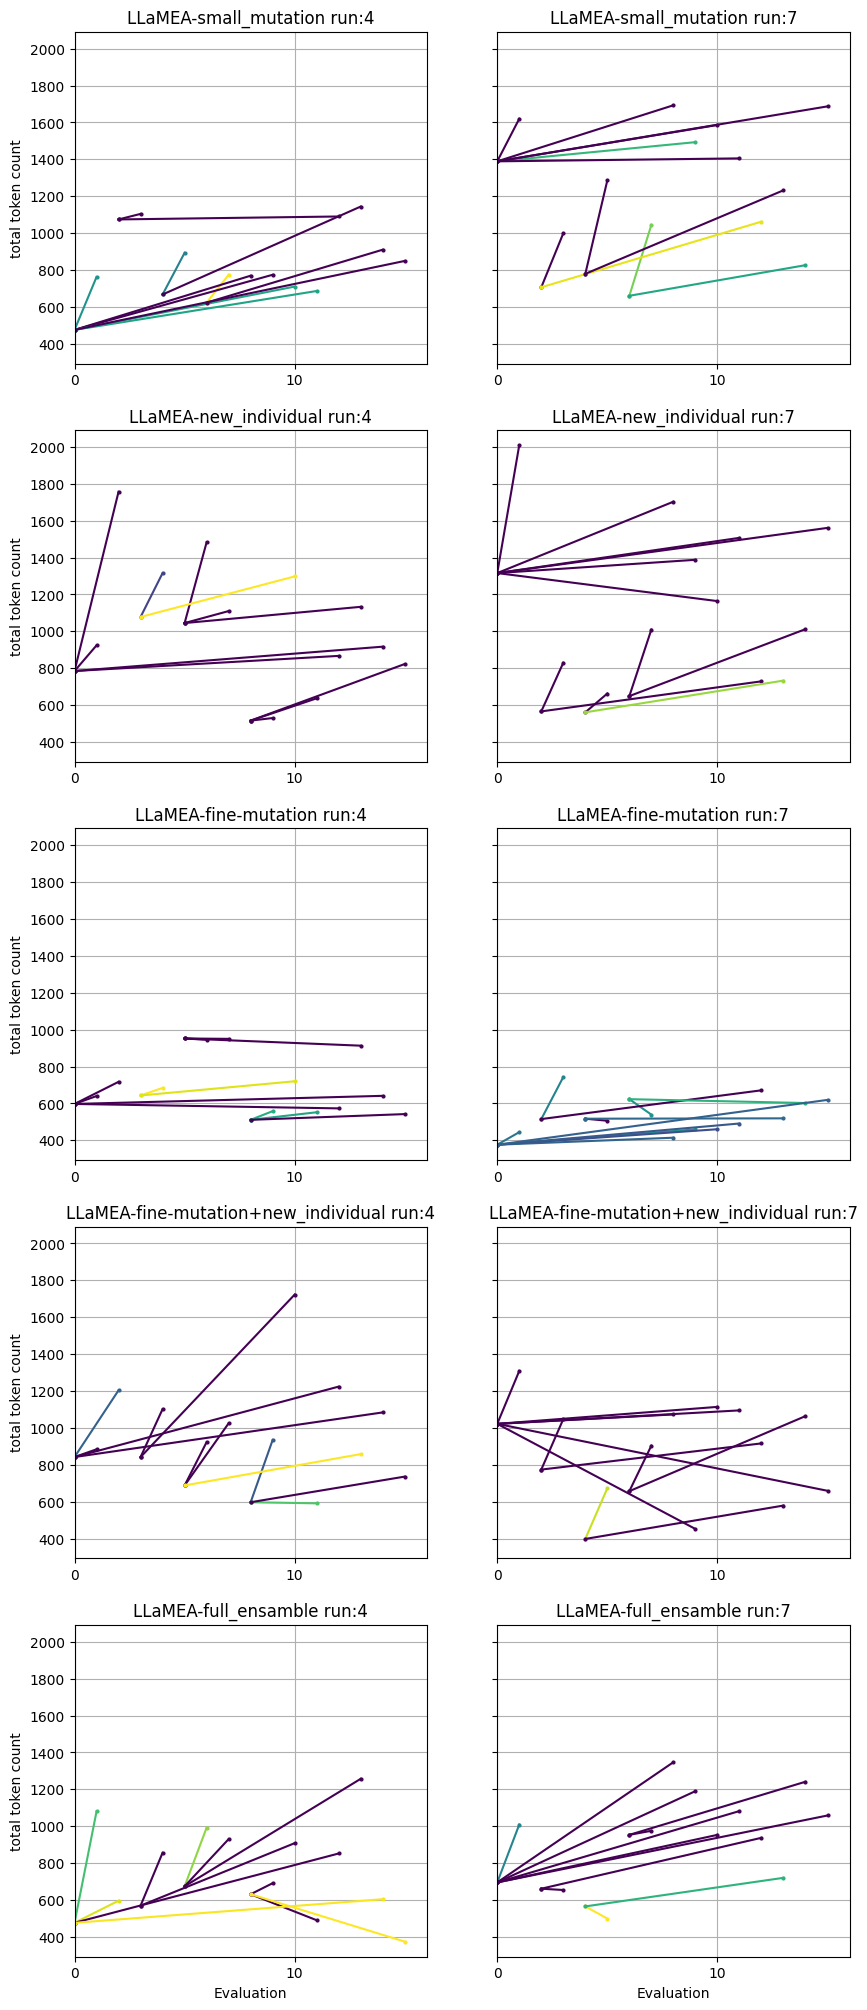

In [ ]:
plot_experiment_CEG(logger, save=False, budget=16, max_seeds=10)

### Fitness Table
* `iohblade` also comes with a fitness table logger, and different ways to plot the fitness of the population for each method used.

In [ ]:
from iohblade.plots import fitness_table

fitness_table(logger)

,MA_BBOB
LLaMEA-fine-mutation,0.70 ± 0.10 (p=0.995)
LLaMEA-fine-mutation+new_individual,0.70 ± 0.03 (p=0.995)
LLaMEA-full_ensamble,0.55 ± 0.13 (p=0.597)
LLaMEA-new_individual,0.25 ± 0.14 (p=0.259)
LLaMEA-small_mutation,0.65 ± 0.05 (p=0.683)


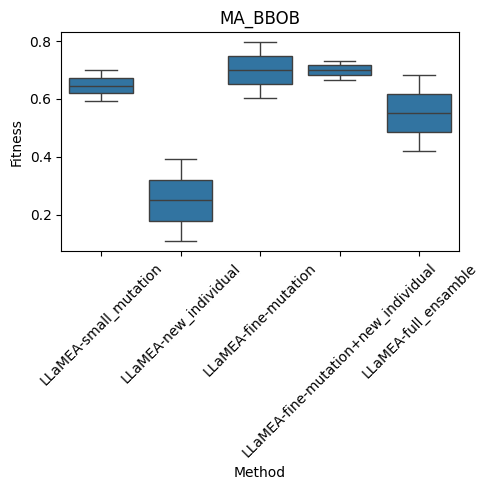

In [ ]:
from iohblade.plots import plot_boxplot_fitness
plot_boxplot_fitness(logger)

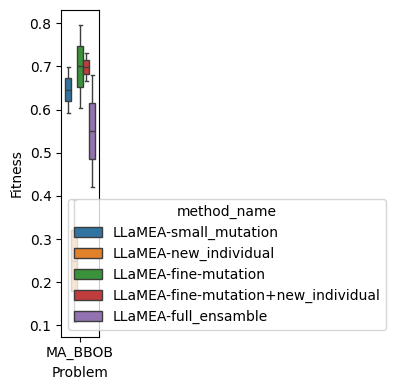

In [ ]:
# This one really needs some work.
from iohblade.plots import plot_boxplot_fitness_hue
plot_boxplot_fitness_hue(logger)

### Plot Token Usage.
* Since we are relying on LLM to generate new algorithms, keeping a track of the tokens used, is also important.
* `iohblade` provides a feature to measure and log the amount of tokens used as well.

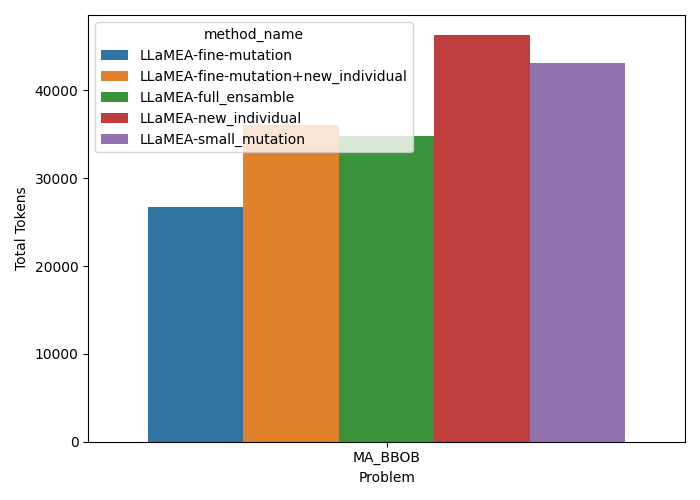

In [ ]:
from iohblade.plots import plot_token_usage
from IPython.display import Image

plot_token_usage(logger)      # <--- Stores image in logger directory named `token_usage.png`.
display(Image(filename=logger.dirname + '/token_usage.png'))

# BLADE-Web Application
* `iohblade` also comes with a `stream-lit` web application, which can be used to view convergence plot of completed tasks, download best code solutions, and monitor ongoing tasks. Just use:
```bash
$: uv run iohblade-webapp
```
